In [91]:
%cd ..

/home/bhkuser/bhklab/katy


In [2]:
import pandas as pd
from readii.process.subset import selectByColumnValue
from readii.process.label import setPatientIdAsIndex
from readii.io.loaders.general import loadFileToDataFrame
from readii_2_roqc.utils.loaders import load_dataset_config
from pathlib import Path
import numpy as np
from damply import dirs

In [65]:
dataset = "RADCURE"
config, dataset_name, full_dataset_name = load_dataset_config(dataset)

clinical_config = config["CLINICAL"]
clinical_file = clinical_config["FILE"]

raw_clinical_data = loadFileToDataFrame(dirs.RAWDATA / full_dataset_name / "clinical" / clinical_file)
indexed_clinical_data = setPatientIdAsIndex(raw_clinical_data)

# Oropharynx subset

In [66]:
opc_clinical_data = selectByColumnValue(indexed_clinical_data, include_col_values={"Ds Site": ["Oropharynx"]})
# opc_clinical_data.to_csv(dirs.PROCDATA / full_dataset_name / "clinical" / f"{dataset}_OPC_subset.csv", index=True, index_label='id')

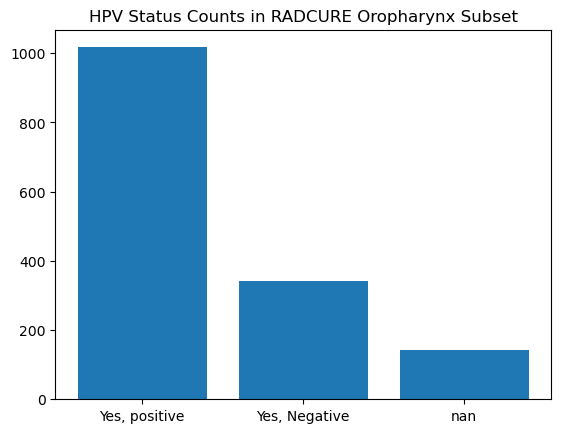

In [23]:
import matplotlib.pyplot as plt

hpv_counts = opc_clinical_data['HPV'].value_counts(dropna=False)
hpv_counts.index = hpv_counts.index.astype(str)

plt.bar(hpv_counts.index, hpv_counts.values)
title = plt.title(f"HPV Status Counts in {dataset} Oropharynx Subset")

In [ ]:
hpv_negative = opc_clinical_data[opc_clinical_data['HPV'] == 'Yes, Negative']
hpv_neg_subset = hpv_negative[['Sex', 'ECOG PS', 'Smoking Status', 'T', 'N', 'M ', 'Stage', 'HPV', 'Tx Modality','Chemo', 'Status']]
hpv_neg_demographics = hpv_neg_subset.apply(lambda x: x.value_counts(dropna=False)).T.stack()
hpv_neg_demographics.to_csv(dirs.PROCDATA / full_dataset_name / "clinical" / f"{dataset}_OPC_HPVneg_demographics.csv", index=True, index_label='Variable')



In [79]:
hpv_positive = opc_clinical_data[opc_clinical_data['HPV'] == 'Yes, positive']
hpv_pos_subset = hpv_positive[['Sex', 'ECOG PS', 'Smoking Status', 'T', 'N', 'M ', 'Stage', 'HPV', 'Tx Modality','Chemo', 'Status']]
hpv_pos_demographics = hpv_pos_subset.apply(lambda x: x.value_counts(dropna=False)).T.stack()

hpv_pos_demographics.to_csv(dirs.PROCDATA / full_dataset_name / "clinical" / f"{dataset}_OPC_HPVpos_demographics.csv", index=True, index_label='Variable')

In [ ]:
hpv_positive.groupby(['Sex', 'Chemo']).apply(lambda x: x.sample(n=81, random_state=10), include_groups=False)

In [28]:
hpv_positive.columns

Index(['Age', 'Sex', 'ECOG PS', 'Smoking PY', 'Smoking Status', 'Ds Site',
       'Subsite', 'T', 'N', 'M ', 'Stage', 'Path', 'HPV', 'Tx Modality',
       'Chemo', 'RT Start', 'Dose', 'Fx', 'Last FU', 'Status', 'Length FU',
       'Date of Death', 'Cause of Death', 'Local', 'Date Local', 'Regional',
       'Date Regional', 'Distant', 'Date Distant', '2nd Ca', 'Date 2nd Ca',
       'RADCURE-challenge', 'ContrastEnhanced'],
      dtype='object')

# Hypopharynx Subset

In [80]:
hpc_clinical_data = selectByColumnValue(indexed_clinical_data, include_col_values={"Ds Site": ["Hypopharynx"]})
hpc_clinical_data.to_csv(dirs.PROCDATA / full_dataset_name / "clinical" / f"{dataset}_HPC_subset.csv", index=True, index_label='id')
hpc_clinical_data.shape

(162, 33)

In [81]:
hpc_subset = hpc_clinical_data[['Sex', 'ECOG PS', 'Smoking Status', 'T', 'N', 'M ', 'Stage', 'HPV', 'Tx Modality','Chemo', 'Status']]
hpc_demographics = hpc_subset.apply(lambda x: x.value_counts(dropna=False)).T.stack()
hpc_demographics.to_csv(dirs.PROCDATA / full_dataset_name / "clinical" / f"{dataset}_HPC_demographics.csv", index=True, index_label='Variable')

# Nasopharynx Subset

In [82]:
npc_clinical_data = selectByColumnValue(indexed_clinical_data, include_col_values={"Ds Site": ["Nasopharynx"]})
npc_clinical_data.to_csv(dirs.PROCDATA / full_dataset_name / "clinical" / f"{dataset}_NPC_subset.csv", index=True, index_label='id')

In [83]:
npc_subset = npc_clinical_data[['Sex', 'ECOG PS', 'Smoking Status', 'T', 'N', 'M ', 'Stage', 'HPV', 'Tx Modality','Chemo', 'Status']]
npc_demographics = npc_subset.apply(lambda x: x.value_counts(dropna=False)).T.stack()
npc_demographics.to_csv(dirs.PROCDATA / full_dataset_name / "clinical" / f"{dataset}_NPC_demographics.csv", index=True, index_label='Variable')

# Add MeshVolume as column

In [88]:
feature_file_path = dirs.RESULTS / full_dataset_name / "features" / "pyradiomics" / "pyradiomics_h4h_all_images_features" / "original_full_features.csv"

volume_data = pd.read_csv(feature_file_path, usecols=['SampleID', 'original_shape_MeshVolume'])

In [ ]:
# remove four digits at the end of SampleID to match clinical data IDs
volume_data['SampleID'] = volume_data['SampleID'].str.replace(r'_\d{4}$', '', regex=True)

volume_data = setPatientID

0      RADCURE-0005
1      RADCURE-0006
2      RADCURE-0007
3      RADCURE-0010
4      RADCURE-0011
           ...     
984    RADCURE-4125
985    RADCURE-4126
986    RADCURE-4127
987    RADCURE-4128
988    RADCURE-4129
Name: SampleID, Length: 989, dtype: object